## Modelo predictivo NETFLIX
- Este código entrena un modelo de regresión lineal para predecir la duración de una película basada en el año de lanzamiento, el país y el género. Después de entrenar el modelo, evalúa su rendimiento utilizando el conjunto de prueba y muestra las predicciones frente a los valores reales.

### Paso 1: Preparación de los Datos

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Leer el archivo CSV de Netflix como DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

print(netflix_df.head())

# Subconjunto del DataFrame para el tipo "Movie"
netflix_subset = netflix_df[netflix_df["type"] == "Movie"]

# Seleccionar solo las columnas de interés
netflix_movies = netflix_subset[["title", "country", "genre", "release_year", "duration"]]

# Manejar valores nulos sin usar inplace
netflix_movies = netflix_movies.dropna()

# Crear una copia para la visualización antes de convertir variables categóricas en dummy
netflix_movies_viz = netflix_movies.copy()

# Convertir variables categóricas en variables dummy para el modelo
netflix_movies = pd.get_dummies(netflix_movies, columns=["country", "genre"], drop_first=True)

# Separar las características (X) del target (y)
X = netflix_movies.drop(columns=["title", "duration"])
y = netflix_movies["duration"]

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year  duration  \
0    August 14, 2020          2020         4   
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009        80   
4    January 1, 2020          2008       123

### Paso 2: División de Datos en Entrenamiento y Prueba

In [21]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Paso 3: Entrenamiento del Modelo

In [22]:
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

LinearRegression()

###  Paso 4: Evaluación del Modelo

In [23]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 21.130243509937944


### Paso 5: Visualización

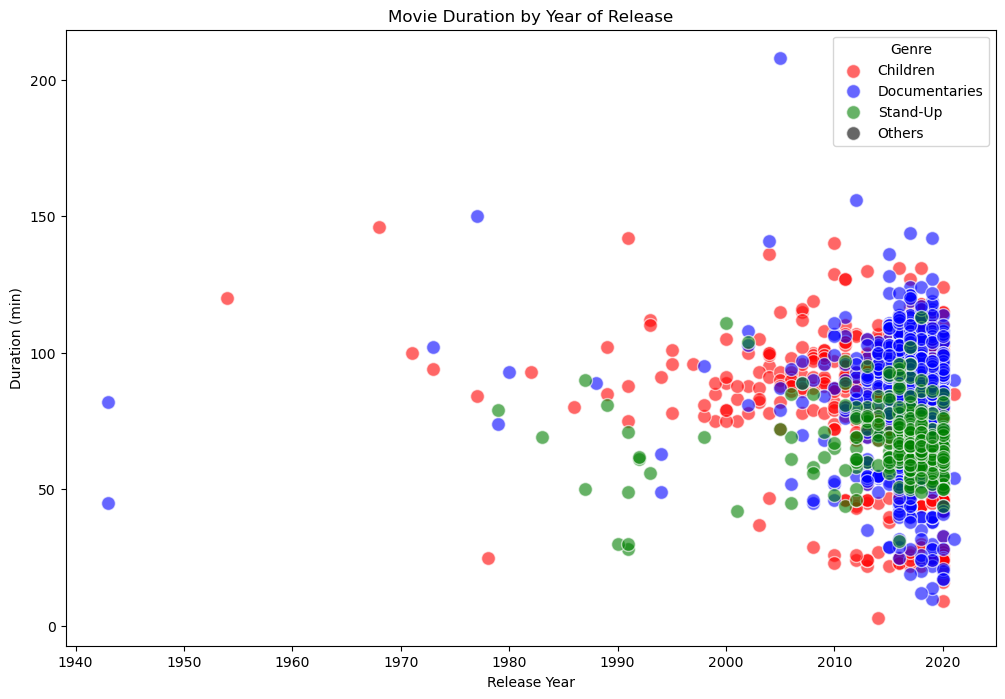

In [24]:
color_map = {
    "Children": "red",
    "Documentaries": "blue",
    "Stand-Up": "green",
    "Others": "black"
}

# Crear una columna 'color' en netflix_movies_viz para asignar colores según el género
netflix_movies_viz['color'] = netflix_movies_viz['genre'].apply(lambda x: color_map.get(x, "black"))

# Crear una figura para el gráfico
plt.figure(figsize=(12, 8))

# Crear un scatter plot de duration versus release_year con colores por género
for genre, color in color_map.items():
    subset = netflix_movies_viz[netflix_movies_viz['genre'] == genre]
    plt.scatter(subset['release_year'], subset['duration'], c=color, label=genre, alpha=0.6, edgecolors='w', s=100)

# Título y etiquetas de los ejes
plt.title("Movie Duration by Year of Release")
plt.xlabel("Release Year")
plt.ylabel("Duration (min)")

# Añadir una leyenda
plt.legend(title="Genre")

# Mostrar el gráfico
plt.show()

### Conclusión
- Un RMSE de 21.13 minutos significa que, en promedio, las predicciones del modelo tienen un error de ±21.13 minutos. Esto es una medida de cuánto se desvían las predicciones del modelo de las duraciones reales de las películas.